In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
items = pd.read_csv("../data/input/items.csv")
item_categories = pd.read_csv("../data/input/item_categories.csv")
shops = pd.read_csv("../data/input/shops.csv")
train = pd.read_csv("../data/input/sales_train.csv.gz")

In [3]:
train = pd.read_csv("../data/input/sales_train.csv.gz")
test = pd.read_csv("../data/input/test.csv.gz")
sample_predict = pd.read_csv("../data/input/sample_submission.csv.gz")

In [4]:
sample_predict.columns

Index(['ID', 'item_cnt_month'], dtype='object')

## データの確認
- train の各特徴量の種類，分布，欠損具合に付いて確認
- test : train 同様に確認，train との違いについて確認

In [33]:
# どのカラムにも null は存在しない

display(train.head())
print(train.isnull().any(axis=0))

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


date              False
date_block_num    False
shop_id           False
item_id           False
item_price        False
item_cnt_day      False
dtype: bool


In [45]:
# date について
# 日付情報のデータ -> 日付特徴量作成関数等を作っても良いかもしれない？？
# 2013-1-1 ~ 2015-10-31 まで存在 -> 間に抜けはないのか？？

np.sort(pd.to_datetime(train['date'], format='%d.%m.%Y'))
train['datetime'] = pd.to_datetime(train['date'], format='%d.%m.%Y')

array(['2013-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', ...,
       '2015-10-31T00:00:00.000000000', '2015-10-31T00:00:00.000000000',
       '2015-10-31T00:00:00.000000000'], dtype='datetime64[ns]')

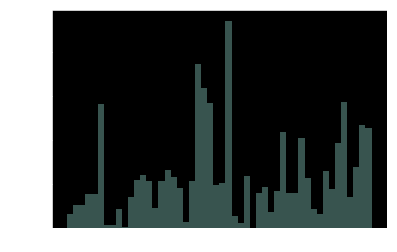

In [31]:
sns.distplot(train['shop_id'].values, kde=False)

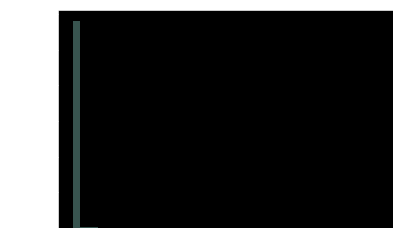

In [32]:
# 極端に高価なアイテムが一部存在する？ アイテムと値段は必ずしも一対一ではなさそう
sns.distplot(train['item_price'].values, kde=False)

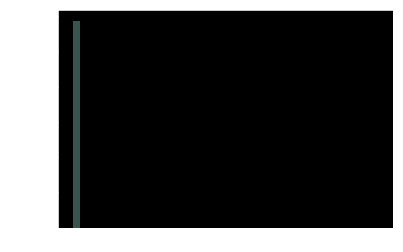

In [35]:
# かなり売れている日（外れ値 が存在する) -> 除外できるか？？
sns.distplot(train['item_cnt_day'].values, kde=False)
train['item_cnt_day'].max()

In [41]:
train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

KeyboardInterrupt: 

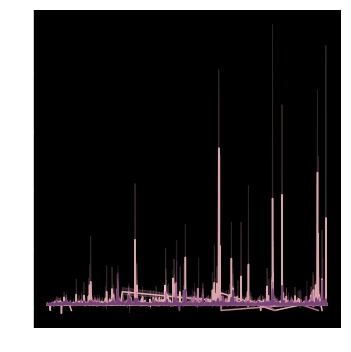

In [46]:
sns.relplot(x="datetime", y="item_cnt_day", hue="shop_id", kind="line", data=train)

In [48]:
display(train.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime
0,02.01.2013,0,59,22154,999.00,1.0,2013-01-02
1,03.01.2013,0,25,2552,899.00,1.0,2013-01-03
2,05.01.2013,0,25,2552,899.00,-1.0,2013-01-05
3,06.01.2013,0,25,2554,1709.05,1.0,2013-01-06
4,15.01.2013,0,25,2555,1099.00,1.0,2013-01-15


In [49]:
display(test.head())

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [50]:
display(sample_predict.head())

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [58]:
train_s = pd.merge(train, shops, on="shop_id", sort=False)
train_si = pd.merge(train_s, items, on="item_id", sort=False)
train_siic = pd.merge(train_si, item_categories, on="item_category_id", sort=False)

numerical_features = ['item_price', 'item_cnt_day']
categorical_features = ['date_block_num', 'item_category_name']

In [60]:
display(train_siic.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,datetime,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,2013-01-02,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,02.01.2013,0,25,22154,999.0,1.0,2013-01-02,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,03.01.2013,0,25,22154,999.0,1.0,2013-01-03,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,20.01.2013,0,25,22154,999.0,1.0,2013-01-20,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,23.01.2013,0,25,22154,999.0,1.0,2013-01-23,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
